# Tutoraggio 1

## Esercizio 1

Data la funzione:

$f(x) = e^{2x - 2} - \cos(x), \quad x \in [0,1]$

### Punto a

Spiegare perché è possibile stabilire che nell'intervallo considerato $f$ ammette un'unica radice.

1. La funzione $f$ è continua dato che è composizione di funzioni continue;
2. la funzione ha valutazioni in $a$ e $b$ di segno discorde, ovvero si dimostra tramite il teorema di Cauchy che la funzione ammette almeno uno zero;
    - $f(0) = e^{-2} - 1 < 0$
    - $f(1) = 1 - cos(1) > 0$
3. la funzione è monotona crescente o decrescente, si può stabilire tramite calcolo della derivata prima di $f$
    - $f'(x) = 2 e^{2x-2} + sin(x) > 0$, $\forall x \in [0,1]$

Per verificare che $f$ ammette zero unico si può anche impiegare il grafico della funzione.

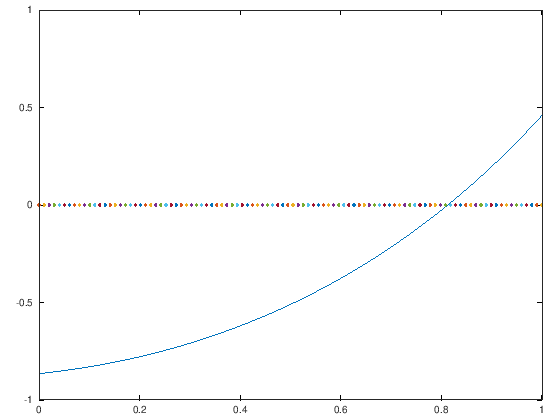

In [1]:
f = @(x) exp(2*x-2) - cos(x);
t = linspace(0, 1);

plot(t, f(t), t, 0)

### Punto b

Detta $\sigma$ l'unica radice di $f$ in $[0,1]$, stabilire se entrambe le seguenti funzioni di iterazione:

$$ g_1(x) = \frac{\log_e(\cos(x)) + 2}{2},  g_2(x) = \arccos(e^{2x-2})$$

possono generare un procedimento iterativo convergente a $\sigma$ e, in caso affermativo, calcolarne l'ordine di convergenza.

#### Funzione g1(x)

- $\log_e(\cos(x))$ è ben definito in $[0,1]$, si ha che $\cos(x) > 0, \forall x \in [0,1]$, perciò la scrittura di $g_1(x)$ è valida.

- Il punto fisso di $g_1(x)$ è zero di $f(x)$, in altri termini vale $\sigma = g_1(\sigma)$
    - $\sigma = \frac{\log_e(\cos(\sigma)) + 2}{2} \implies e^{2 \sigma - 2} = \cos(\sigma)$ perciò si ottiene $f(\sigma) = e^{2\sigma - 2} - \cos(\sigma) = 0$
    
Ciò permette di affermare che $g_1(x)$ è un buon candidato per un metodo di punto fisso. Per verificare che $g_1(x)$ sia effettivamente in grado di generare un procedimento iterativo convergente a $\sigma$ si deve calcolare la derivata prima.

$g'_1(x) = \frac{1}{2} \cdot \frac{\sin(x)}{\cos(x)} = \frac{\tan(x)}{2}$

Dato che vale $|g'_1(x)| < 1$ (la tangente vale $1$ per un valore pari a circa $\frac{\pi}{2}$), in $[0,1]$, allora si ha convergenza.

Per determinare se la convergenza è superlineare si verifica se un valore per cui $g'_1$ si annulla in $[0,1]$ è anche un possibile zero di $f$. Ciò non accade, dato che $g'_1$ si annulla solo in $0$ e per questo valore $f(0) < 0$. Si può concludere che un metodo iterativo di punto fisso che sfrutta $g'_1$ converge con convergenza lineare.

#### Funzione g2(x)

Si verifica se vale: $\sigma = \arccos(e^{2 \sigma - 2}) = g_2(\sigma)$

Si ha $\cos(\sigma) = e^{2\sigma - 2} \implies f(\sigma) = e^{2\sigma - 2} - cos(\sigma) = 0$, perciò anche la funzione $g_2$ è un buon candidato per un metodo di punto fisso con $f$.

In modo analogo a quanto visto per $g_1$ si calcola la derivata di $g_2$ e si verifica se vale la condizione $|g'_2(x)| < 1$ in $[0,1]$.

$g'_2(x) = \frac{-2e^{2x - 2}}{\sqrt{1 - e^{4x - 4}}}$

Per $x \to 1$ si ha $g'_2(x) \to \infty$ perciò la funzione non converge.

### Punto c

Utilizzando le funzioni del punto b che possono generare un procedimento iterativoconvergente si implementi il metood id punto fisso per il calcolo dello zero $\sigma$ di $f$. Rappresentare su un grafico il valore dell'approssimazione $x_k$ ottenuta al variare di $k \ge 0$.

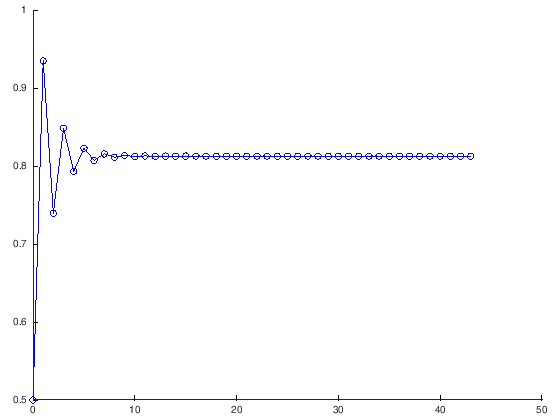

In [2]:
g_1 = @(x) (log(cos(x)) + 2) / 2;
x = [1/2; g_1(1/2)];

count = 2;

while abs(x(count) - x(count - 1)) > 10^-12 % da 10^-6 è accettabile
    count = count + 1;
    x(count) = g_1(x(count-1));
end

figure
plot((0:1:count-1), x, "b-o")
box off

## Esercizio 2

A partire dal sistema lineare:

- si determini per quali valori di $k$, con $k \in \mathcal{R}^{+}$ il sistema lineare ammette un'unica soluzione. 
- Per $k = 2$ si risolva il sistema lineare implementando l'algoritmo di fattorizzazione LU parziale.

In [9]:
pkg load symbolic
addpath("./functions")

### Punti a e b

In [18]:
% conversione del sistema in forma matriciale
% workaround: https://github.com/cbm755/octsympy/issues/8#issuecomment-40945844
syms k
A = [-3/2 4 -k; [1 -3/2 0]; 0 -k 1];

% se la matrice è invertibile il sistema ammette un'unica soluzione
% se il determinante è non nullo allora la matrice è invertibile
det(A)
solve(det(A))
warning("off", "OctSymPy:sym:rationalapprox")

ans = (sym)

   2   7
  k  - ─
       4

ans = (sym 2×1 matrix)

  ⎡-√7 ⎤
  ⎢────⎥
  ⎢ 2  ⎥
  ⎢    ⎥
  ⎢ √7 ⎥
  ⎢ ── ⎥
  ⎣ 2  ⎦



Per $k = \frac{\sqrt{7}}{2}$ si può determinare se sono presenti soluzioni tramite il teorema di Rouche-Capelli.

Si determinano quindi il rango di $A$ e di $(A|b)$. Dato che $\det(A) = \frac{-\sqrt{7}}{2} < 0$ e $rank(A|b) = rank(A)$ il sistema non ha soluzioni per $k = \frac{\sqrt{7}}{2}$.

In [15]:
rank(subs(A, k, sqrt(7)/2))

ans = 3


In [17]:
rank([subs(A, k, sqrt(7)/2), [1; 0; 0]])

ans = 3


In [1]:
A = double(subs(A, k, 2));
b = [1 0 0]';
[L, U, P, err] = gauss_partial(A);
[x, err] = lusolve(L, U, P, [], b);
x

error: 'A' undefined near line 1 column 17
error: 'A' undefined near line 1 column 32
error: 'L' undefined near line 1 column 20
error: 'x' undefined near line 1 column 1


### Punti c e d

Si permutano le equazioni del sistema lineare in modo che la matrice dei coefficienti associata al nuovo sistema lineare sia simmetrica e definita positiva $\forall k \in (0, k^*)$.

Per prima cosa si nota che l'unico elemento non ripetuto è 4, perciò deve stare su una diagonale perché $A$ possa essere simmetrica. Si effettua quindi uno scambio di righe nella matrice A.

In [53]:
A = [[1 3/2 0]; -3/2 4 -k; 0 -k 1];
b = [0 1 0]';

Perché $A$ sia definita positiva per ogni valore di $k$ si può ricorrere a due approcci:

- calcolo degli autovalori di $A$, con parametro $k$, e verifica della loro positività. Questo approccio richiede il calcolo del polinomio caratteristico della matrice $A$;

- applicazione del criterio di Sylvester, per cui affinché $A$ simmetrica sia definita positiva è necessario che tutti il determinante di tutti i minori principali di $A$ siano strettamente positivi.

#### Primo metodo con il polinomio caratteristico

Sapendo che il polinomio caratteristico è pari a $\det(A - xI)$, si ha:

$$\begin{align*}\mbox{p}_{car} &= \det(A)\\ &= (1-x)^{2(4-x)} -  \frac{9}{4}(1-x) - (1-x)k^2 \\ &= (1-x)\left(x^2 - 5x + \frac{7}{4} - k^2 \right)\end{align*}$$

Ci sono tre autovalori. 1 è sempre positivo. Per gli altri due si impiegano la regole per cui il termine noto di un polinomio di secondo grado è pari al prodotto delle radici mentre il coefficiente di $x$ è pari al negativo della somma delle radici pe revitare di risolvere il polinomio.

Devono perciò valere le seguenti condizioni:

- $-5 < 0$
- $\frac{7}{4} - k^2 > 0 \implies -\frac{\sqrt{7}}{2} < k < \frac{\sqrt{7}}{2}$


#### Secondo metodo con il criterio di Sylvester

Si calcolano i determinanti dei tre minori principali e si verifica che siano tutti positivi:

- $\det(1) > 0$
- $\det \left (\begin{bmatrix}
       1 & -\frac{3}{2} \\[0.3em]
       -\frac{3}{2} & 4 \\[0.3em]
     \end{bmatrix} \right ) = 4 - \frac{9}{4} = \frac{7}{4} > 0$
- $\det(A) = 4 - \frac{9}{4} - k^2 > 0$

Tutte e tre le condizioni sono valide per $k \in \left [-\frac{\sqrt{7}}{2}, \frac{\sqrt{7}}{2} \right ]$. 

Dato che $k^*$ deve essere positivo si ha che la matrice dei coefficienti associata al nuovo sistema lineare è simmetrica e definita positiva se $k^* < \frac{\sqrt{7}}{2}$.

In [37]:
%syms x
%A = [1-x, -3/2, 0; -3/2, 4-x, -k; 0,-k,1-x]
%solve(det(A))

In [73]:
b = [0 1 0]';

syms k
k = linspace(0, sqrt(7)/2, 22); % 20 punti e gli estremi
k = k(2:end-1);
norma_inf = zeros(20, 1);
norma_2 = zeros(20, 1);

for j = 1:20

    A = [[1 -3/2 0]; -3/2 4 -k(j); 0 -k(j) 1];
    [R, p] = chol(A);
    
    if p > 0
        warning("La matrice A non risulta definita positiva");
    end
    
    y = lsolve(R', b);
    x = usolve(R, y);
    
    norma_2(j) = norm(x, 2);
    norma_inf(j) = norm(x, inf);

end

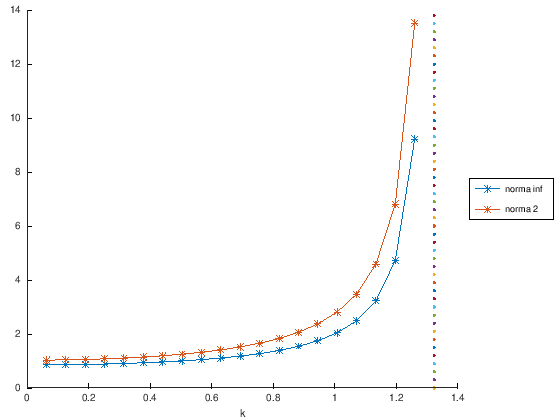

In [94]:
figure
plot( k, norma_inf, "-*", ...
      k, norma_2, "-*", ...
      sqrt(7)/2, 0:0.3:14);
legend("norma inf","norma 2","Location","eastoutside");
xlabel("k");
box off

A partire dal valore delle ascisse $\frac{\sqrt{7}}{2}$ si nota che la norma della soluzione cresce. 

Questo perché quando $k = \frac{\sqrt{7}}{2}$ la matrice $A$ è singolare, quindi non invertibile. 

Per $k \to \frac{\sqrt{7}}{2}$ l'autovalore di $A$ diventa sempre più piccolo e la matrice che si ottiene a partire dalla risoluzione del sistema lineare associato ad $A$ tramite l'algoritmo di Cholesky ha un autovalore sempre più grande. Ciò provoca la dilatazione di entrambe le norme. Questo effetto si verifica indipendentemente dalla norma scelta.